# Scipy
scipy 中有许多科学计算常见问题的工具，比如内置了图像处理， 优化，统计等等相关问题的子模块。

https://github.com/jayleicn/scipy-lecture-notes-zh-CN/releases

In [13]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [14]:
import os
def get_file_path(filename):
    return os.path.join('./data-dir', filename) 

# 文件输入输出: scipy.io

## 载入和保存matlab文件

In [3]:
from scipy import io as spio

filename = get_file_path('file.mat')
a = np.ones((3, 3))
spio.savemat(filename, {'a': a}) # 保存一个字典到文件

data = spio.loadmat(filename, struct_as_record=True) # 读取mat文件
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 读取图像

In [6]:
# from scipy import misc

filename = get_file_path('fname.png')
# misc.imread(filename) # 返回array

# Matplotlib中有一个相似的函数
import matplotlib.pyplot as plt
arr = plt.imread(filename)


** 参见 ** : <br/>
载入文本文件: numpy.loadtxt()/numpy.savetxt() <br/>
格式化载入text/csv文件: numpy.genfromtxt()/numpy.recfromcsv() <br/>
高效快速载入numpy指定类型的，二进制格式文件: numpy.save()/numpy.load() <br/>

# 特殊函数: scipy.special

# 线性代数操作: scipy.linalg
scipy.linalg 模块提供了基于BLAS和LAPACK的高效的代数操作方法

## scipy.linalg.det() 计算方阵的行列式

In [8]:
from scipy import linalg

arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)


# linalg.det(np.ones((3, 4))) # ValueError

-2.0

## scipy.linalg.inv() 计算方阵的逆矩阵:

In [18]:
arr = np.array([[1, 2],
                [3, 4]])

iarr = linalg.inv(arr)
iarr

np.allclose(np.dot(arr, iarr), np.eye(2)) # 验证

# 如果计算奇异矩阵(其行列式为0)的逆矩阵，函数会抛出 LinAlgError:
arr = np.array([[3, 2],
               [6, 4]])
# linalg.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

True

## 奇异值分解(SVD)

In [26]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
arr
uarr, spec, vharr = linalg.svd(arr)
uarr, spec, vharr

# 原始的矩阵可以使用 svd 的输出结果和 np.dot 的乘积重新生成
svd_mat = uarr.dot(np.diag(spec)).dot(vharr)
np.allclose(svd_mat, arr)

array([[1, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

(array([[-0.1617463 , -0.98659196,  0.02178164],
        [-0.47456365,  0.09711667,  0.87484724],
        [-0.86523261,  0.13116653, -0.48390895]]),
 array([14.88982544,  0.45294236,  0.29654967]),
 array([[-0.45513179, -0.54511245, -0.70406496],
        [ 0.20258033,  0.70658087, -0.67801525],
        [-0.86707339,  0.45121601,  0.21115836]]))

True

# 快速傅里叶变换: scipy.fftpack
scipy.fftpack 模块包含了快速傅里叶变换的功能.

In [40]:
# 下面是一个噪声信号的例子

time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)


# 观察者不知道信号的频率，只知道信号的采样间隙time_step; 
# sig信号是来自真实函数的，那么 傅里叶变换是对称的。 
# scipy.fftpack.fftfreq() 函数会生成采样频率，scipy.fftpack.fft() 则用于进行快速傅里叶变化

from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

# 信号频率可通过如下方式获得:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)

# import numpy as np
# import pylab as pl
# pl.figure()
# pl.plot(freqs, power)
# pl.xlabel('Frequency [Hz]')
# pl.ylabel('plower')
# axes = pl.axes([0.3, 0.3, 0.5, 0.5])
# pl.title('Peak frequency')
# pl.plot(freqs[:8], power[:8])
# pl.setp(axes, yticks=[])


# 滤去傅里叶变化后的信号中的高频噪声:
sig_fft[np.abs(sample_freq) > freq] = 0

# 去噪后信号可通过如下方式计算： scipy.fftpack.ifft() function:
main_sig = fftpack.ifft(sig_fft)

# pl.figure()
# pl.plot(time_vec, sig)
# pl.plot(time_vec, main_sig, linewidth=3)
# pl.xlabel('Time [s]')
# pl.ylabel('Amplitude')

True

# 优化和拟合: scipy.optimize
优化用于求解最小化或者等式一类问题的数值解

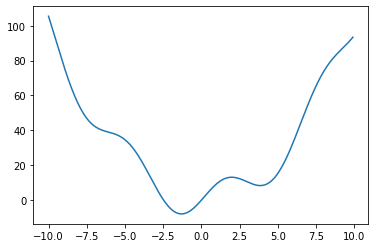

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


array([-1.30644012])

array([3.83746709])

In [43]:
from scipy import optimize

# 定义函数: 此函数有一个全局最小值，约为-1.3， 还有一个局部最小值，约为3.8
def f(x):
    return x**2 + 10*np.sin(x)


# 画出其图像
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 


# 一个常用的求解此函数最小值的方法是确定初始点，然后执行梯度下降算法。
# 这个方法的缺陷在于有时候可能会被困在一个局部最小值，而得不到全局的最小值。 这取决与初始点的选取
# BFGS算法是一个 很好的适用于此的方法:
optimize.fmin_bfgs(f, 0)

optimize.fmin_bfgs(f, 3, disp=0)

In [ ]:
# 其他函数

## 寻找标量函数的零点

In [47]:
root = optimize.fsolve(f, 1)
root

root2 = optimize.fsolve(f, -2.5)
root2

array([0.])

array([-2.47948183])

## 曲线拟合

In [48]:
# 假设我们现在有从函数 f 中采样得到的含有一些噪声的数据
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)


# 我们已经知道了函数的形式是 (x^2 + \sin(x) ) 但不知道每一项系数的大小。 
# 我们可以使用最小二乘算法来进行曲线拟合得到系数的值
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([0.99142946, 9.74650644])

# 统计和随机数: scipy.stats

## 直方图和概率密度函数

<ipython-input-49-cc0fde2d11b3>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  histogram, bins = np.histogram(a, bins=bins, normed=True)


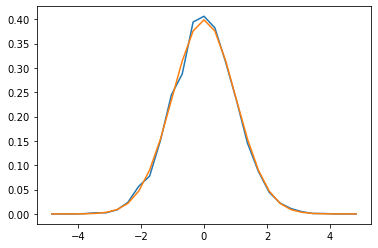

In [49]:
from scipy import stats
import numpy as np
import pylab as pl
a = np.random.normal(size=10000)

bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(a, bins=bins, normed=True)
bins = 0.5*(bins[1:] + bins[:-1])

from scipy import stats
b = stats.norm.pdf(bins)
pl.plot(bins, histogram)
pl.plot(bins, b)


In [53]:
# 如果我们事先已经知道所要处理的随机过程属于某一个随机过程族(比如正态过程)，可以采用最大似然估计来 得到相关参数的值
loc, std = stats.norm.fit(a)
loc 

-0.00262954743224412

## 百分位数

In [55]:
# 中位数 (也叫 第50百分位数)
np.median(a)   
stats.scoreatpercentile(a, 50)     

-0.00043987522072415754

-0.00043987522072415754

## 统计检验

In [56]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)   

Ttest_indResult(statistic=-2.2894301254040905, pvalue=0.02399873997112147)

# 插值计算: scipy.interpolate
scipy.interpolate 模块在拟合实验数据并估计未知点数值方面非常有用

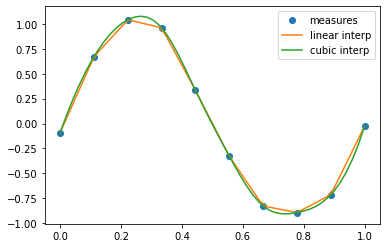

In [57]:
# 产生一个近似正弦函数的一系列实验数据:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

# `scipy.interpolate.interp1d` 类可以创建一个线性插值函数
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

# `scipy.interpolate.linear_interp` 可以在需要的时候获取某些值
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

# 三次插值函数可通过 kind 关键字参数得到
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

pl.plot(measured_time, measures, 'o', ms=6, label='measures')
pl.plot(computed_time, linear_results, label='linear interp')
pl.plot(computed_time, cubic_results, label='cubic interp')
pl.legend()

# Numerical integration: scipy.integrate

# 信号处理: scipy.signal

# 图像处理: scipy.ndimage